# Supervised Learning

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle


In [2]:
df_sml_01 = pd.read_csv('./output/data_02.csv',sep=',',index_col=0)

In [3]:
df_sml_01['DateTime'] = pd.to_datetime(df_sml_01['DateTime'])
#df_sml_01['DayWeekName'] = df_sml_01['DateTime'].dt.day_name()
df_sml_01.drop('DateTime',axis=1,inplace=True)

In [4]:
df_sml_01.head()

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def week_weekend(day):
    weekend_list = [6,7]
    if day in weekend_list:
        day = 'Weekend'
    else:
        day = 'WorkingDay'
    return day

In [6]:
df_sml_01['DayWeek'] = df_sml_01['DayWeek'].apply(week_weekend)

In [7]:
df_sml_01.head()

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,WorkingDay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WorkingDay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,WorkingDay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,WorkingDay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WorkingDay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_smld_01 = pd.get_dummies(df_sml_01, columns=['DayWeek'], drop_first=True)

In [9]:
df_smld_01.head()

,M001,M002,M003,M004,M005,M006,M007,M009,M010,M011,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,DayWeek_WorkingDay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Separación X,y

In [10]:
cols = [col for col in df_smld_01.columns.values if col != "DayWeek_WorkingDay"]
X = df_smld_01[cols]
y = df_smld_01["DayWeek_WorkingDay"]

### Train, test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_test.shape, y_test.shape)
display(y_test.value_counts())

(3428, 31)

(3428,)

1    2936
0     492
Name: DayWeek_WorkingDay, dtype: int64

### cls_LogisticRegression

In [38]:
%%time
cls_LR = LogisticRegression()
cls_LR.fit(X_train,y_train)
print('Trained model score is {}'.format(cls_LR.score(X_test,y_test)))

Trained model score is 0.8561843640606768
CPU times: user 129 ms, sys: 76 µs, total: 129 ms
Wall time: 124 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
%%time
p_LR = pd.DataFrame(np.array([cls_LR.predict(X_test),y_test]).T)
p_LR = pd.concat([p_LR,pd.DataFrame(cls_LR.predict_proba(X_test))],axis=1)
p_LR.columns = ["Predicted","GroundTruth","WeekEnd","WorkingDays"]
display(p_LR.head(15))

,Predicted,GroundTruth,WeekEnd,WorkingDays
0,1,1,0.185636,0.814364
1,1,1,0.185636,0.814364
2,1,1,0.185636,0.814364
3,1,1,0.104013,0.895987
4,1,1,0.185636,0.814364
5,1,1,0.185636,0.814364
6,1,1,0.185636,0.814364
7,1,0,0.185636,0.814364
8,1,1,0.111746,0.888254
9,1,1,0.185636,0.814364


CPU times: user 31.3 ms, sys: 32.2 ms, total: 63.6 ms
Wall time: 25.3 ms


In [40]:
filename_lr = './output/lr_model.sav'
pickle.dump(cls_LR, open(filename_lr, 'wb'))

### cls_svm

In [16]:
%%time
cls_svm = svm.SVC(probability=True)
cls_svm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


CPU times: user 1min 3s, sys: 892 ms, total: 1min 4s
Wall time: 1min 4s


In [18]:
%%time
p_svm = pd.DataFrame(np.array([cls_svm.predict(X_test),y_test]).T)
p_svm = pd.concat([p_svm,pd.DataFrame(cls_svm.predict_proba(X_test))],axis=1)
p_svm.columns = ["Predicted","GroundTruth","WeekEnd","WorkingDays"]
display(p_svm.head(15))

,Predicted,GroundTruth,WeekEnd,WorkingDays
0,1,1,0.142426,0.857574
1,1,1,0.142426,0.857574
2,1,1,0.142426,0.857574
3,1,1,0.143943,0.856057
4,1,1,0.142426,0.857574
5,1,1,0.142426,0.857574
6,1,1,0.142426,0.857574
7,1,0,0.142426,0.857574
8,1,1,0.142789,0.857211
9,1,1,0.142426,0.857574


CPU times: user 3.18 s, sys: 67.8 ms, total: 3.25 s
Wall time: 3.16 s


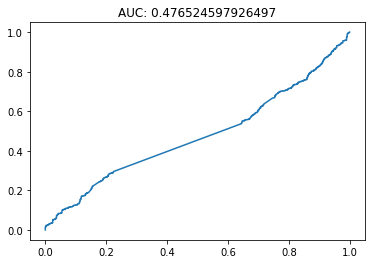

In [19]:
plotMetrics(X_test,y_test,cls_svm)

In [35]:
filename_svm = './output/svm_model.sav'
pickle.dump(cls_svm, open(filename_svm, 'wb'))

### cls_KNN

In [20]:
%%time
cls_KNN = KNeighborsClassifier(n_neighbors=10)
cls_KNN.fit(X_train,y_train)
print('Trained model score is {}'.format(cls_KNN.score(X_test,y_test)))

Trained model score is 0.8544340723453909
CPU times: user 1.73 s, sys: 20.2 ms, total: 1.75 s
Wall time: 1.75 s


In [41]:
%%time
p_KNN = pd.DataFrame(np.array([cls_KNN.predict(X_test),y_test]).T)
p_KNN = pd.concat([p_KNN,pd.DataFrame(cls_KNN.predict_proba(X_test))],axis=1)
p_KNN.columns = ["Predicted","GroundTruth","WeekEnd","WorkingDays"]
display(p_KNN.head())

,Predicted,GroundTruth,WeekEnd,WorkingDays
0,1,1,0.2,0.8
1,1,1,0.2,0.8
2,1,1,0.2,0.8
3,1,1,0.2,0.8
4,1,1,0.2,0.8


CPU times: user 2.05 s, sys: 3.69 ms, total: 2.05 s
Wall time: 2.05 s


In [43]:
filename_knn = './output/knn_model.sav'
pickle.dump(cls_KNN, open(filename_knn, 'wb'))

### cls_RandomForest

In [23]:
%%time
cls_RandomForest = RandomForestClassifier(n_estimators=20)
cls_RandomForest.fit(X_train,y_train)
print('Trained model score is {}'.format(cls_RandomForest.score(X_test,y_test)))

Trained model score is 0.8395565927654609
CPU times: user 413 ms, sys: 72.4 ms, total: 485 ms
Wall time: 379 ms


In [24]:
%%time
p_RandomForest = pd.DataFrame(np.array([cls_RandomForest.predict(X_test),y_test]).T)
p_RandomForest = pd.concat([p_RandomForest,pd.DataFrame(cls_RandomForest.predict_proba(X_test))],axis=1)
p_RandomForest.columns = ["Predicted","GroundTruth","WeekEnd","WorkingDays"]
display(p_RandomForest.head(15))

,Predicted,GroundTruth,WeekEnd,WorkingDays
0,1,1,0.199102,0.800898
1,1,1,0.199102,0.800898
2,1,1,0.199102,0.800898
3,1,1,0.050000,0.950000
4,1,1,0.199102,0.800898
5,1,1,0.199102,0.800898
6,1,1,0.199102,0.800898
7,1,0,0.199102,0.800898
8,1,1,0.300000,0.700000
9,1,1,0.199102,0.800898


CPU times: user 60 ms, sys: 54 µs, total: 60 ms
Wall time: 58.2 ms


In [42]:
filename_rf = './output/rf_model.sav'
pickle.dump(cls_RandomForest, open(filename_rf, 'wb'))

In [30]:
def plotMetricsCompare(X, y, cls1, cls2, cls3, cls4):
    y_pred_proba1 = cls1.predict_proba(X)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y, y_pred_proba1)
    
    y_pred_proba2 = cls2.predict_proba(X)[::,1]
    fpr2, tpr2, _ = metrics.roc_curve(y,  y_pred_proba2)
    auc2 = metrics.roc_auc_score(y, y_pred_proba2)
    
    y_pred_proba3 = cls3.predict_proba(X)[::,1]
    fpr3, tpr3, _ = metrics.roc_curve(y,  y_pred_proba3)
    auc3 = metrics.roc_auc_score(y, y_pred_proba3)
    
    y_pred_proba4 = cls4.predict_proba(X)[::,1]
    fpr4, tpr4, _ = metrics.roc_curve(y,  y_pred_proba4)
    auc4 = metrics.roc_auc_score(y, y_pred_proba4)
    
    fig = plt.figure(figsize=(13,13))
    plt.title("AUC Model LG: {:2f} AUC Model SVM: {:2f} AUC Model KNN: {:2f} AUC Model RF: {:2f}".format(auc1,auc2,auc3,auc4))
    plt.plot(fpr1,tpr1)
    plt.plot(fpr2,tpr2)
    plt.plot(fpr3,tpr3)
    plt.plot(fpr4,tpr4)
    plt.legend(["LogisticRegression","Support Vector Machines","KNeighbors","RandomForest"])

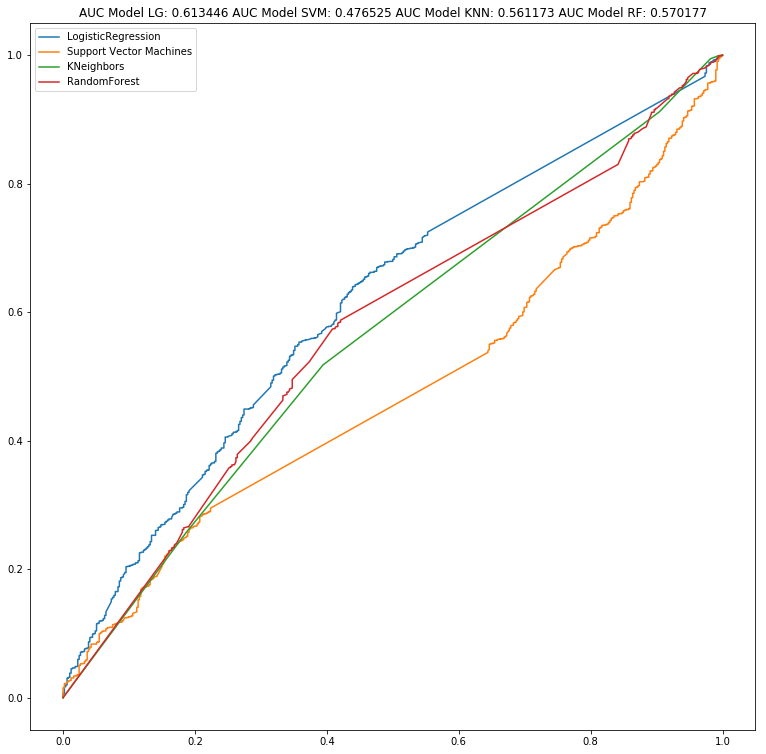

In [31]:
plotMetricsCompare(X_test,y_test,cls_LR,cls_svm,cls_KNN,cls_RandomForest)

In [14]:
def plotMetrics(X, y, cls):
    y_pred_proba = cls.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    plt.title("AUC: {}".format(auc))
    plt.plot(fpr,tpr)